In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

List of all Billionaires of 2021 as curated by the Forbes with their mentioned "Source of Income", "Country: where they live in", "Their Global Rankings in terms of Net Worth" and many more

https://www.kaggle.com/roysouravcu/forbes-billionaires-of-2021

## Import and clean data

In [69]:
data = pd.read_csv("C:/Users/imoge/Projects/Datasets/billionaire.csv")

In [70]:
data.shape

(2755, 7)

In [71]:
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


In [73]:
# Remove non-numerical characters and set to float
data["NetWorth"] = data["NetWorth"].str.strip("$")
data["NetWorth"] = data["NetWorth"].str.strip("B")
data["NetWorth"] = data["NetWorth"].astype(float)

In [74]:
data.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [75]:
data.describe()

,NetWorth,Rank,Age
count,2755.000000,2755.000000,2676.000000
mean,4.749220,1345.663521,63.113602
std,9.615358,772.669811,13.445153
min,1.000000,1.000000,18.000000
25%,1.500000,680.000000,54.000000
50%,2.300000,1362.000000,63.000000
75%,4.200000,2035.000000,73.000000
max,177.000000,2674.000000,99.000000


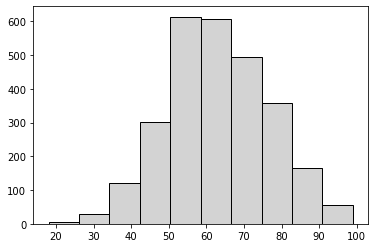

In [82]:
plt.hist(data["Age"], color = "lightgrey",ec = "k")
plt.show()

In [77]:
# Fill the missing ages with median age (mean and median are very similar, ages are normally distributed)
data['Age'] = data['Age'].fillna(data['Age'].median())

In [323]:
data["Age"].skew()

0.04702745245461765

The age is fairly normally distributed

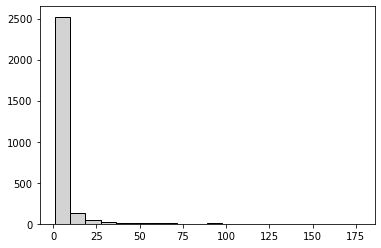

In [130]:
plt.hist(data["NetWorth"], bins = 20, color = "lightgrey", ec = "k")
plt.show()

In [331]:
data["NetWorth"].skew()

8.676450029823238

Networth is quite highly positively skewed, so most networth values lie between 0 and $25b

## Data exploration and visualisation

In [83]:
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


### Number of Billionaires

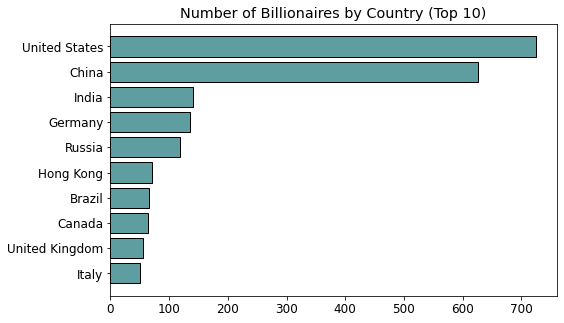

In [415]:
country = pd.DataFrame(data["Country"].value_counts().head(10))
fig, ax = plt.subplots(figsize = (8,5))
ax.barh(country.index, country.Country, color= "cadetblue",ec = "k")
ax.invert_yaxis()
ax.set_title("Number of Billionaires by Country (Top 10)")
plt.show()

The US and China have the largest number of billionaires

### Net Worth

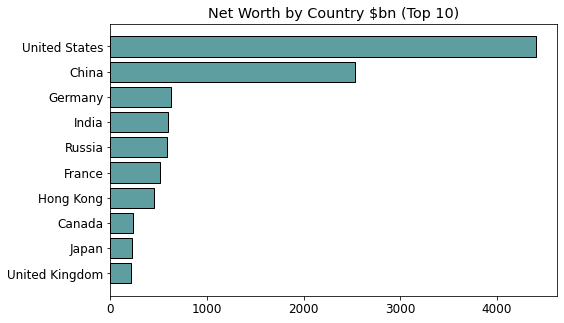

In [417]:
worth = data.groupby("Country",as_index = False)["NetWorth"].sum().sort_values(by = "NetWorth",ascending = False).head(10)
fig, ax = plt.subplots(figsize = (8,5))
ax.barh(worth.Country, worth.NetWorth, color= "cadetblue",ec = "k")
ax.invert_yaxis()
ax.set_title("Net Worth by Country $bn (Top 10)")
plt.show()

The USA and China also have the highest net worth

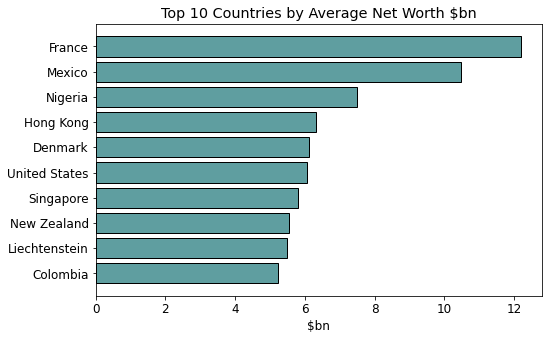

In [418]:
count_worth = data[["Country", "NetWorth"]]
count_worth_av = pd.DataFrame(count_worth.groupby("Country")["NetWorth"].mean()).sort_values(by = "NetWorth",ascending = False).head(10)
fig, ax = plt.subplots(figsize = (8,5))
ax.invert_yaxis()
ax.barh(count_worth_av.index, count_worth_av.NetWorth, color= "cadetblue",ec = "k")
ax.set_title("Top 10 Countries by Average Net Worth $bn")
ax.set_xlabel("$bn")
plt.show()

When looking at the average net worth, France has the highest and interestingly Nigeria and Mexico also feature in the list.

### Average Net Worth

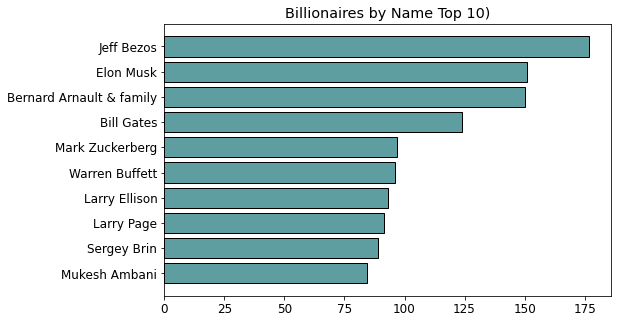

In [439]:
bill_worth = data[["Name", "NetWorth"]].set_index("Name").head(10)
fig, ax = plt.subplots(figsize = (8,5))
ax.invert_yaxis()
ax.barh(bill_worth.index, bill_worth.NetWorth, color= "cadetblue",ec = "k")
ax.set_title("Billionaires by Name Top 10)")
plt.show()

### Number of Billionaires by Industry

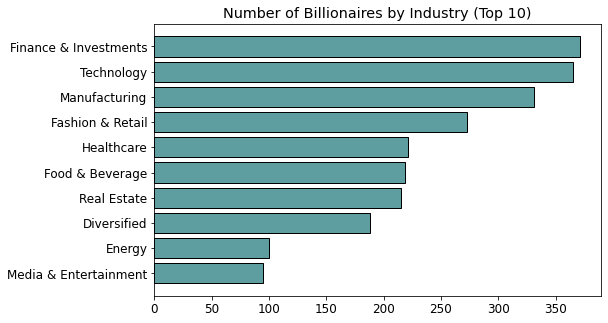

In [419]:
industry = pd.DataFrame(data["Industry"].value_counts().head(10))
fig, ax = plt.subplots(figsize = (8,5))
ax.invert_yaxis()
ax.barh(industry.index, industry.Industry, color= "cadetblue",ec = "k")
ax.set_title("Number of Billionaires by Industry (Top 10)")
plt.show()

Finance and investments and technology have the largest number of billionaires

### Net Worth by Industry

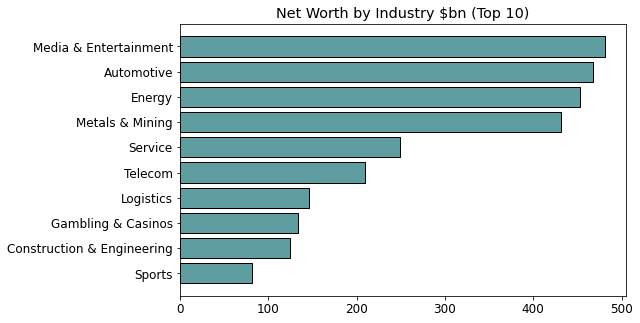

In [423]:
industry_worth = data.groupby("Industry",as_index = False)["NetWorth"].sum().sort_values(by = "NetWorth").head(10)
fig, ax = plt.subplots(figsize = (8,5))
ax.barh(industry_worth.Industry, industry_worth.NetWorth, color= "cadetblue",ec = "k")
ax.set_title("Net Worth by Industry $bn (Top 10)")
plt.show()

The highest net worth by industry is found in media and entertainment, automotive, energy and mining

### Number of Billionaires by Sector

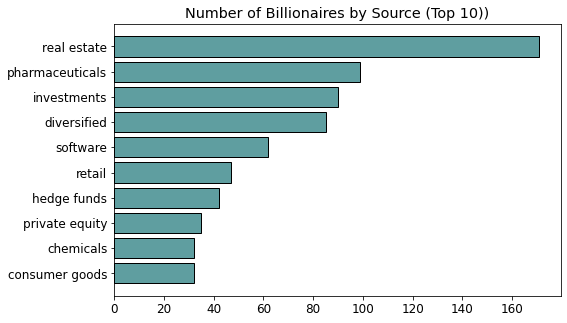

In [425]:
source = pd.DataFrame(data["Source"].value_counts().head(10))
fig, ax = plt.subplots(figsize = (8,5))
ax.invert_yaxis()
ax.barh(source.index, source.Source, color= "cadetblue",ec = "k")
ax.set_title("Number of Billionaires by Source (Top 10))")
plt.show()

The largest number of billionaires are within the real estate sector

In [330]:
#a = data["Source"].value_counts().head()
#index = a.index
#sources = a.values
#custom_colors = ["darkseagreen","olivedrab","beige","mediumaquamarine","cadetblue"]
#plt.figure(figsize=(5, 5))
#plt.pie(sources, labels=index, colors = custom_colors)
#central_circle = plt.Circle((0, 0), 0.5, color='white')
#fig = plt.gcf()
#fig.gca().add_artist(central_circle)
#plt.rc('font', size=12)
#plt.title("Number of Billionaires by Domain (Top 5)", fontsize=20)
#plt.show()

### Net Worth by Sector

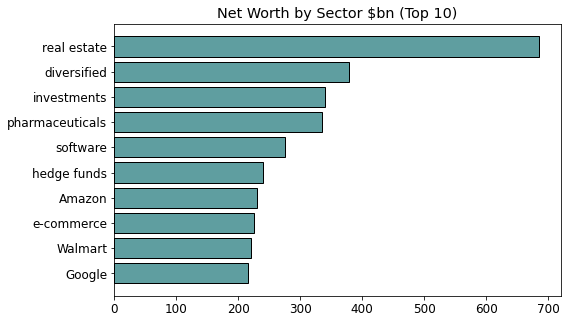

In [435]:
sector_worth = data.groupby("Source",as_index = False)["NetWorth"].sum().sort_values(by = "NetWorth",ascending = False).head(10)
fig, ax = plt.subplots(figsize = (8,5))
ax.invert_yaxis()
ax.barh(sector_worth.Source, sector_worth.NetWorth, color= "cadetblue",ec = "k")
ax.set_title("Net Worth by Sector $bn (Top 10)")
plt.show()

Real estate overall has the highest net worth but Amazon, Walmart and Google as independent countries feature in the top 10.

### Are older billionaires worth more?

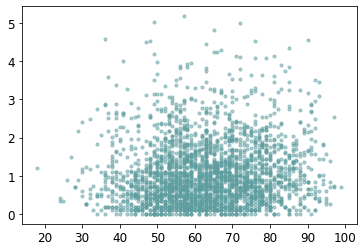

In [273]:
plt.scatter(data["Age"],np.log(data["NetWorth"]),color = "cadetblue", s = 10, alpha = 0.5)
plt.show()

Age and networth seem to have some correlation, as age increases networth also seems to increase.

In [335]:
data.corr()

,NetWorth,Rank,Age
NetWorth,1.000000,-0.475346,0.033738
Rank,-0.475346,1.000000,-0.103277
Age,0.033738,-0.103277,1.000000


However, although the correlation between the two features is positive it is very small

In [354]:
age = data.groupby("Country",as_index = False)["Age"].mean().sort_values(by = "Age",ascending = False)

In [370]:
age.sort_values(by = "Age").head()

,Country,Age
60,Tanzania,45.000000
23,Iceland,48.500000
12,Denmark,50.200000
42,Norway,51.333333
52,Slovakia,52.000000


Countries with the youngest mean age of billionaires are Tanzania and some of the Nordic countries.

In [371]:
age.sort_values(by = "Age",ascending = False).head()

,Country,Age
14,Eswatini (Swaziland),89.0
43,Oman,82.0
1,Argentina,81.2
56,St. Kitts and Nevis,81.0
0,Algeria,77.0


Countries with the oldest mean age of billionaires are Swaziland, Oman and Argentina

In [355]:
age[age["Country"].isin(countries)]

,Country,Age
24,India,67.628571
66,United States,65.993094
21,Hong Kong,65.056338
18,Germany,63.316176
50,Russia,56.974576
8,China,56.298722


Of those countries with the highest number of billionaires, the mean age for China and Russia is lower than the other countries

### Top industries for the countries with the highest net worth

In [336]:
countries = ["United States","Germany","India","Russia","China","Hong Kong"]
count_ind = data[data["Country"].isin(countries)]
count_ind = pd.crosstab(count_ind["Country"],count_ind["Industry"]).T
count_ind.head(6)

Country,China,Germany,Hong Kong,India,Russia,United States
Industry,,,,,,
Automotive,17,8,3,6,0,18
Construction & Engineering,3,1,0,5,5,3
Diversified,25,1,2,17,6,11
Energy,21,1,4,1,22,33
Fashion & Retail,33,33,2,13,8,54
Finance & Investments,10,10,1,8,20,189


In [337]:
china = pd.DataFrame(count_ind["China"].sort_values(ascending = False).head(5))
germany = pd.DataFrame(count_ind["Germany"].sort_values(ascending = False).head(5))
russia = pd.DataFrame(count_ind["Russia"].sort_values(ascending = False).head(5))
india = pd.DataFrame(count_ind["India"].sort_values(ascending = False).head())
hong = pd.DataFrame(count_ind["Hong Kong"].sort_values(ascending = False).head())
united = pd.DataFrame(count_ind["United States"].sort_values(ascending = False).head())

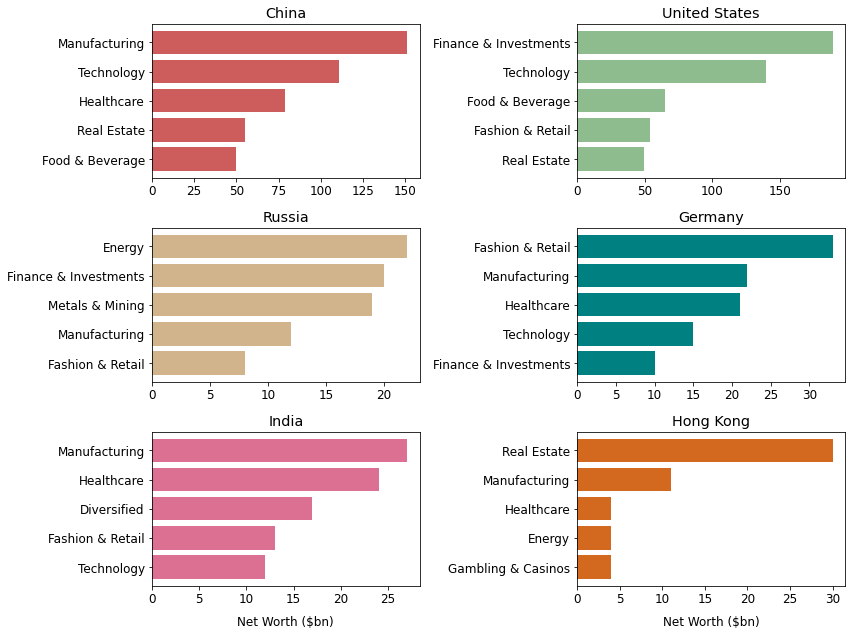

In [338]:
fig, axs = plt.subplots(3,2, figsize = (12,9),)
axs[0,0].barh(china.index, china.China, color = "indianred")
axs[0,1].barh(united.index,united["United States"], color = "darkseagreen")
axs[1,0].barh(russia.index,russia["Russia"], color = "tan")
axs[1,1].barh(germany.index,germany["Germany"], color = "teal")
axs[2,0].barh(india.index,india["India"], color = "palevioletred")
axs[2,1].barh(hong.index,hong["Hong Kong"], color = "chocolate")

axs[0,0].set_title("China")
axs[0,1].set_title("United States")
axs[1,0].set_title("Russia")
axs[1,1].set_title("Germany")
axs[2,0].set_title("India")
axs[2,1].set_title("Hong Kong")

axs[2,0].set_xlabel("Net Worth ($bn)", labelpad = 10)
axs[2,1].set_xlabel("Net Worth ($bn)", labelpad = 10)

axs[0,0].invert_yaxis()
axs[0,1].invert_yaxis()
axs[1,0].invert_yaxis()
axs[1,1].invert_yaxis()
axs[2,0].invert_yaxis()
axs[2,1].invert_yaxis()

fig.tight_layout()
plt.show()

Comparing the net worth of billionaires for the top net worth countries shows there are notable differences between countries. China and India are concentrated in manufacturing whereas the US is focussed on finance and Hong Kong is heavily based on real estate. Russia's highest net worth relates to energy wheras for Germany this is fashion and retail and not manufacturing as you might expect.

## Is there a difference in age of billionaire by industry?

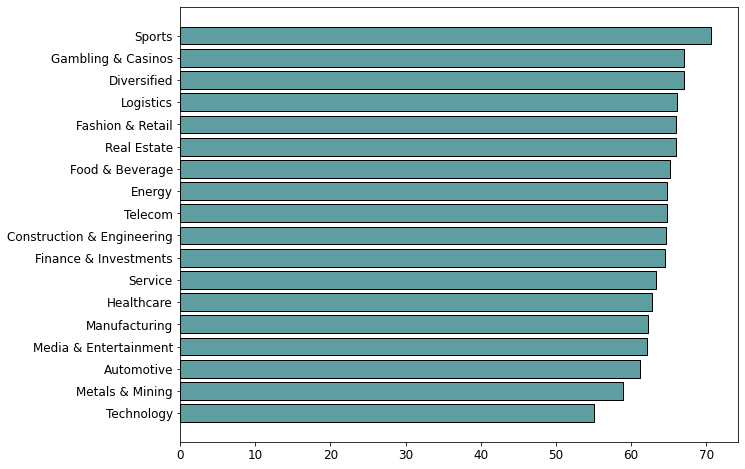

In [387]:
industry = data.groupby("Industry",as_index = False)["Age"].mean().sort_values(by = "Age",ascending = True)
fig, ax = plt.subplots(figsize = (10,8))
ax.barh(industry.Industry, industry.Age,color= "cadetblue",ec = "k")
plt.show()

Younger billionaires are found in technology and mining and older ones in sports and casinos